In [30]:
#Pytanie 1. Co oznacza określenie morfologiczny w ujęciu cyfrowego przetwarzania obrazów.

#Odnosi się do metod analizujących i przetwarzających kształty oraz struktury na obrazach. 
# Techniki morfologiczne, stosujące elementy strukturalne do manipulowania obiektami na obrazach binarnych 
# lub w skali szarości, pozwalają na takie operacje jak erozja, dylatacja, otwarcie i zamknięcie. 
# Te metody są kluczowe do usuwania szumów, wypełniania luk, rozdzielania obiektów oraz ulepszania konturów, 
# co ułatwia dalszą analizę i przetwarzanie obrazów.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion,  binary_dilation
from skimage import morphology, io, color, filters

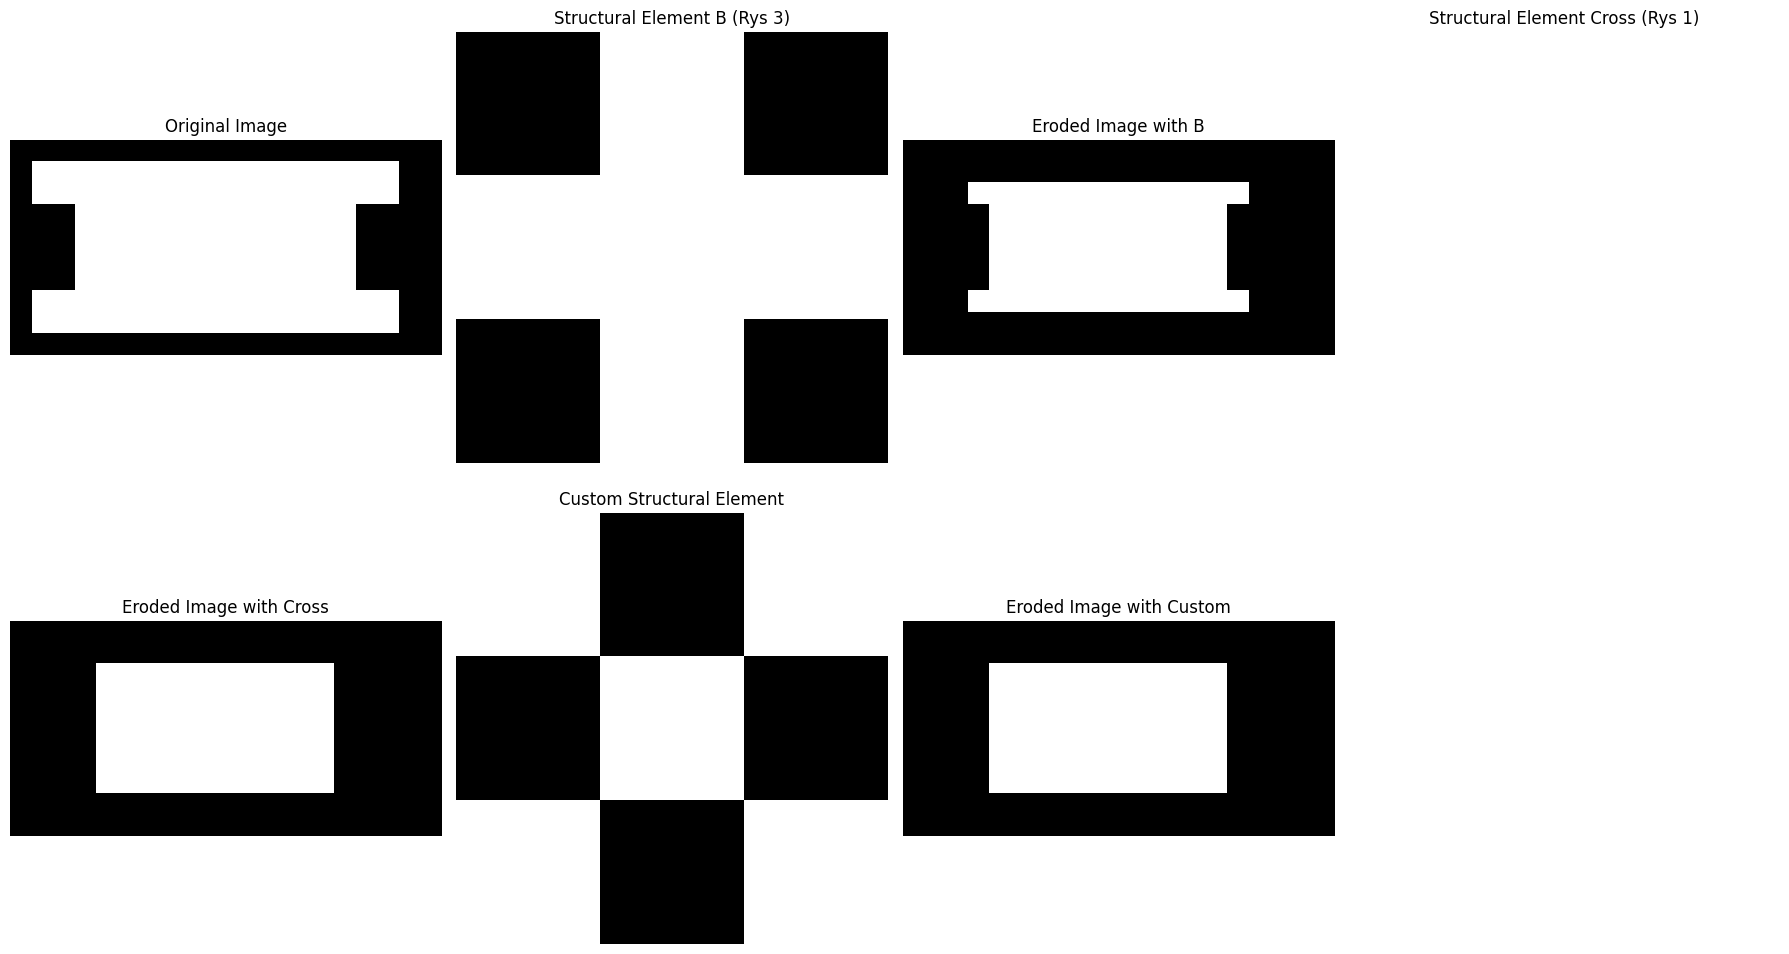

In [32]:
# Tworzenie obrazu "kość" 
image = np.zeros((10, 20), dtype=int)

image[1:9, 1:18] = 1  # Wypełnienie obiektu
image[3:7, 1:3] = 0
image[3:7, 16:18] = 0

# Definicja elementu strukturalnego B
selem3 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

# Definicja elementu strukturalnego 
selem1 = np.array([[True, 1, True],
                   [1,    1, 1],
                   [True, 1, True]])

# Funkcja do wykonywania erozji
def erosion(image, structure):
    return binary_erosion(image, structure=structure).astype(int)

# Wykonywanie erozji
eroded_image_3 = erosion(image, selem3)
eroded_image_1 = erosion(image, selem1)

# Tworzenie własnego elementu strukturalnego
custom_selem = np.array([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
eroded_image_custom = erosion(image, custom_selem)

# Wyświetlanie obrazów
plt.figure(figsize=(18, 10))
titles = ['Original Image', 'Structural Element B (Rys 3)', 'Eroded Image with B',
          'Structural Element Cross (Rys 1)', 'Eroded Image with Cross', 'Custom Structural Element',
          'Eroded Image with Custom']
images = [image, selem3, eroded_image_3, selem1, eroded_image_1, custom_selem, eroded_image_custom]

for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
#Pytanie 2. Opisz element strukturalny. Podaj znaczenie poszczególnych jego elementów składowych.


#Element strukturalny (znany również jako jądro lub maska) to kluczowy komponent w operacjach morfologicznych, 
# takich jak erozja i dylatacja, używany do manipulowania strukturami na obrazach. 

#Element Strukturalny z Rysunku 3 (selem3)
#[[0, 1, 0],
# [1, 1, 1],
# [0, 1, 0]]

#Znaczenie:
#Element strukturalny w kształcie krzyża, gdzie środkowy piksel oraz jego bezpośrednie sąsiedztwo w pionie i
# poziomie (bez rogów) są aktywne (1). W operacji erozji, ten element strukturalny będzie usuwać piksele na obrazie, 
# które nie są całkowicie otoczone przez inne piksele obiektu w kształcie krzyża.

#Element Strukturalny z Rysunku 1 (selem1)

#[[True, 1, True],
#[1,    1, 1],
#[True, 1, True]]

#Znaczenie:
#To modyfikacja standardowego elementu krzyżowego, gdzie wszystkie piksele są aktywne, 
# z dodatkowym przyjęciem, że wartości 'True' mogą być interpretowane jako wartości aktywne.
# W kontekście operacji erozji, zapewnia on jeszcze większą konserwatywność w procesie, 
# usuwając piksele, które nie mają pełnych sąsiedztw odpowiadających tej strukturze.

#Własny Element Strukturalny (custom_selem)

#[[1, 0, 1],
# [0, 1, 0],
# [1, 0, 1]]

#Znaczenie:
#Kreatywny element strukturalny w formie X, który jest znacznie mniej konserwatywny. 
# Taki układ skupia się na pikselach znajdujących się na przekątnych względem centralnego piksela. 
# W erozji, piksel centralny zostanie zachowany tylko wtedy, gdy wszystkie piksele na przekątnych są także obecne, 
# co jest rzadkością i prowadzi do znacznego zmniejszenia obiektów na obrazie.




In [34]:
#Pytanie 3. Co rozumiesz pod pojęciem obiektu w operacjach morfologicznych.

#W kontekście operacji morfologicznych, obiekt to zazwyczaj zbiór pikseli reprezentujących część obrazu, 
# która jest przedmiotem analizy lub przetwarzania. Obiekty te są zwykle odseparowane od tła obrazu, co oznacza, 
# że mają inną wartość pikseli niż tło, zwykle wyższą (jasniejszą) w przypadku obrazów binarnych,
# gdzie obiekt może być reprezentowany przez piksele o wartości 1, a tło przez 0.

In [35]:
#Pytanie 4. Co to jest obraz bitowy i jak go otrzymać.

#Obraz bitowy to obraz składający się tylko z dwóch możliwych wartości pikseli, 0 lub 1, reprezentujących
# odpowiednio tło i obiekt. Takie obrazy są bardzo użyteczne w analizie morfologicznej i przetwarzaniu obrazów 
# cyfrowych, ponieważ upraszczają procesy decyzyjne dotyczące pikseli. Obraz bitowy można otrzymać poprzez progowanie
# obrazu w skali szarości, gdzie ustala się próg, poniżej którego wszystkie wartości zostają przypisane jako 0 (tło),
# a powyżej jako 1 (obiekt).

In [36]:
#Pytanie 5. Co to jest erozja, opisz algorytm.

#Erozja jest operacją morfologiczną przeciwną do dylatacji, która zmniejsza obiekty na obrazie.
# Algorytm erozji polega na usunięciu pikseli z krawędzi obiektów. Erozja używa elementu strukturalnego 
# do przeskanowania obrazu, usuwając piksel centralny elementu z obrazu wyjściowego, chyba że wszyscy jego 
# sąsiedzi w obrazie wejściowym odpowiadają pikselowi obiektu. W praktyce erozja eliminuje wszystkie piksele, 
# dla których element strukturalny nie może całkowicie dopasować się do obiektu, prowadząc do redukcji rozmiarów
# i oddzielania blisko położonych obiektów.

In [37]:
#Pytanie 6. Wyjaśnij dlaczego w kroku n piksel nie zostaje usunięty.

#W kroku n operacji morfologicznej, taki jak erozja, piksel nie zostaje usunięty, jeżeli wszystkie piksele 
# odpowiadające '1' w elemencie strukturalnym pokrywają się z pikselami obiektu o wartości '1' na obrazie.
# Oznacza to, że cała struktura maski pasuje do obiektu w tym miejscu, zatem centralny piksel maski nie zostaje usunięty,
# gdyż spełnia warunki erozji.


In [38]:
#Pytanie 7. Co trzeba zrobić, aby połączenie pomiędzy elementami zostało usunięte?

#Aby usunąć połączenie pomiędzy elementami na obrazie, należy zastosować operację erozji, 
# która redukuje rozmiar obiektów i może pomóc w oddzieleniu blisko położonych lub lekko złączonych elementów. 
# Kluczowe jest odpowiednie dobranie elementu strukturalnego, który będzie dopasowany do kształtu i orientacji
# elementów do oddzielenia. Erozja usunie piksele na krawędziach obiektów, co może skutkować rozdzieleniem tych, 
# które były wcześniej połączone.

In [39]:
#Pytanie 8. Jaki wpływ mają różne kształty elementu strukturalnego na wynik końcowy?

#Kształt elementu strukturalnego ma istotny wpływ na efekty operacji morfologicznych takich jak erozja
# i dylatacja w przetwarzaniu obrazów. Krzyżowy element wpływa na pionowe i poziome struktury, 
# zachowując większe elementy obiektów. Pełny kwadratowy element skutkuje intensywniejszą erozją lub dylatacją, 
# co może prowadzić do znacznego zmniejszenia lub rozszerzenia obiektów. Element w kształcie "X" 
# selektywnie wpływa na przekątne struktury, co jest użyteczne w specjalistycznych zastosowaniach. 
# Wybór odpowiedniego elementu strukturalnego pozwala dostosować przetwarzanie do konkretnych potrzeb analizy obrazu,
# od eliminacji szumów po poprawę rozpoznawania wzorców.

In [40]:
#Pytanie 9. Co to jest dylatacja, opisz algorytm.

#Dylatacja to operacja morfologiczna w przetwarzaniu obrazów, która powiększa i rozszerza obiekty.
# Algorytm dylatacji polega na "rozciągnięciu" obiektów na obrazie poprzez przyłączenie do nich wszystkich pikseli 
# z otoczenia, które stykają się z elementem strukturalnym mającym piksel centralny umieszczony na obiekcie. 
# Element strukturalny, czyli maska określająca kształt rozszerzenia, jest przesuwany przez każdy piksel obrazu; 
# jeśli jakikolwiek piksel z elementu strukturalnego nachodzi na piksel obiektu na obrazie, to piksel centralny 
# elementu strukturalnego zostaje ustawiony jako obiekt (ustawiony na 1).

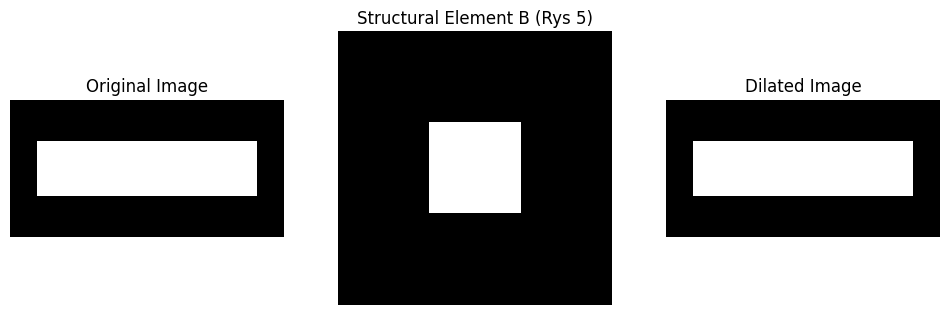

In [41]:
# Definicja obrazu "kość" 
image = np.zeros((10, 20), dtype=int)
image[3:7, 2:18] = 1  # Wypełnienie obiektu

# Definicja elementu strukturalnego B 
selem5 = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# Funkcja do wykonywania dylatacji
def dilation(image, structure):
    return binary_dilation(image, structure=structure).astype(int)

# Wykonywanie dylatacji
dilated_image = dilation(image, selem5)

# Wyświetlanie obrazów
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(selem5, cmap='gray')
plt.title("Structural Element B (Rys 5)")
plt.axis('off')

plt.subplot(133)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

plt.show()

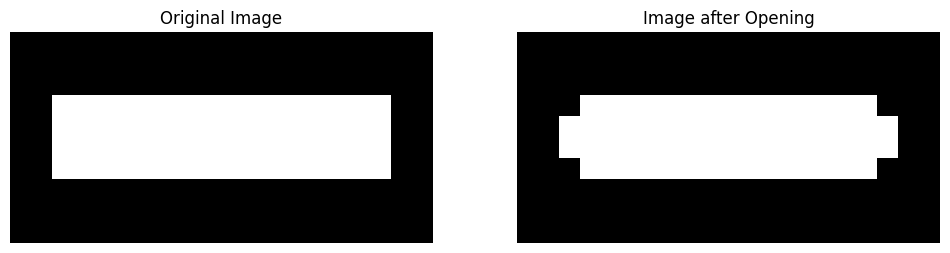

In [42]:
# Tworzenie funkcji do wykonania operacji otwarcia, która łączy erozję i dylatację
def opening(image, structure):
    eroded = binary_erosion(image, structure=structure)
    opened = binary_dilation(eroded, structure=structure)
    return opened

# Definicja elementu strukturalnego
selem_opening = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]])

# Wykonywanie operacji otwarcia na obrazie "kości"
opened_image = opening(image, selem_opening)

# Wyświetlanie obrazu przed i po operacji otwarcia
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(opened_image, cmap='gray')
plt.title("Image after Opening")
plt.axis('off')

plt.show()

In [43]:
#Pytanie 10. Opisz zastosowania operacji otwarcia w cyfrowym przetwarzaniu obrazów.

#Operacja otwarcia w cyfrowym przetwarzaniu obrazów, połączenie erozji następnie dylatacji, 
# jest używana do usuwania małych obiektów i szumów z obrazu bez znaczącego wpływu na rozmiar większych obiektów.
# Jest to szczególnie przydatne w analizie obrazów medycznych do usuwania przypadkowych pikseli szumów oraz 
# drobnych artefaktów, które mogą wpływać na interpretację wyników. W przemyśle, operacja ta znajduje
# zastosowanie w poprawie jakości obrazów produkcyjnych, gdzie może służyć do usunięcia drobnych defektów 
# na powierzchniach. W systemach monitoringu i rozpoznawania obiektów, otwarcie może pomóc w eliminacji 
# nieistotnych elementów tła, ułatwiając detekcję i śledzenie celów. Dodatkowo, w przetwarzaniu obrazów 
# satelitarnych i lotniczych, otwarcie może być stosowane do klarowania obrazu poprzez usunięcie drobnych 
# chmur lub innych przejściowych zjawisk, które mogłyby zasłonić ważne cechy terenu.

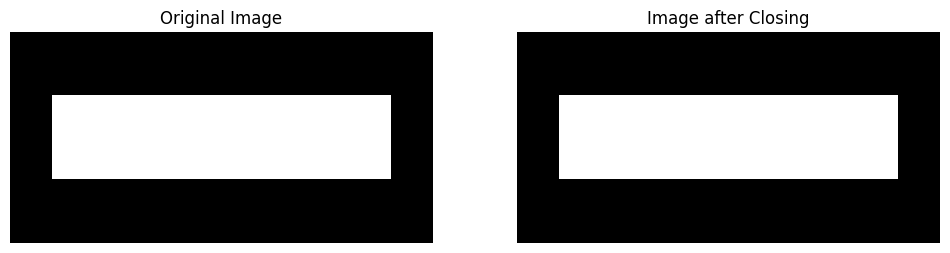

In [44]:
# Tworzenie funkcji do wykonania operacji domknięcia, która łączy dylatację i erozję
def closing(image, structure):
    dilated = binary_dilation(image, structure=structure)
    closed = binary_erosion(dilated, structure=structure)
    return closed

# Wykonywanie operacji domknięcia na obrazie "kości"
closed_image = closing(image, selem_opening)

# Wyświetlanie obrazu przed i po operacji domknięcia
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(closed_image, cmap='gray')
plt.title("Image after Closing")
plt.axis('off')

plt.show()

In [45]:
#Pytanie 11. Opisz zastosowania operacji domknięcia w cyfrowym przetwarzaniu obrazów.


#Operacja domknięcia w cyfrowym przetwarzaniu obrazów to technika morfologiczna, która łączy dylatację z erozją. 
# Jest stosowana głównie do eliminowania małych otworów i szczelin w obiektach, a także do wypełniania luk i 
# 'mostkowania' małych przerw. Ta operacja jest szczególnie przydatna w przetwarzaniu obrazów medycznych, 
# gdzie może pomóc w ujednoliceniu struktury tkanki, ułatwiając identyfikację i analizę patologicznych regionów.
# W przemyśle, operacja domknięcia może być używana do poprawy czytelności kodów kreskowych i innych znaków 
# identyfikacyjnych poprzez zamknięcie niekompletnych elementów. Dodatkowo, jest to narzędzie wykorzystywane 
# w obróbce obrazów satelitarnych lub lotniczych, gdzie może służyć do poprawy wizualizacji drobnych obiektów i 
# struktur, takich jak drogi i mosty, które mogłyby być przerywane z powodu cieniowania lub innych artefaktów.

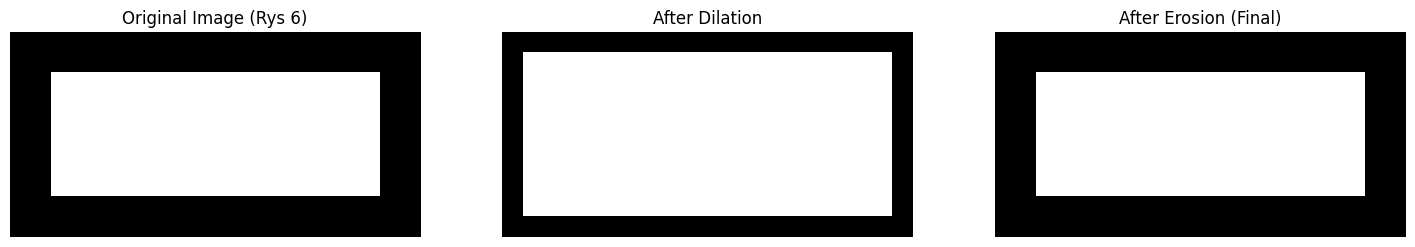

In [46]:
# Definicja obrazu 
image_6 = np.zeros((10, 20), dtype=int)
image_6[2:8, 2:18] = 1  # Wypełnienie obiektu

# Definicja prostokątnego elementu strukturalnego
selem_rect = np.ones((3, 3), dtype=int)

# Wykonanie dylatacji
dilated_image_6 = binary_dilation(image_6, structure=selem_rect)

# Wykonanie erozji na obrazie po dylatacji
result_image_6 = binary_erosion(dilated_image_6, structure=selem_rect)

# Wyświetlenie obrazów
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(image_6, cmap='gray')
plt.title("Original Image (Rys 6)")
plt.axis('off')

plt.subplot(132)
plt.imshow(dilated_image_6, cmap='gray')
plt.title("After Dilation")
plt.axis('off')

plt.subplot(133)
plt.imshow(result_image_6, cmap='gray')
plt.title("After Erosion (Final)")
plt.axis('off')

plt.show()

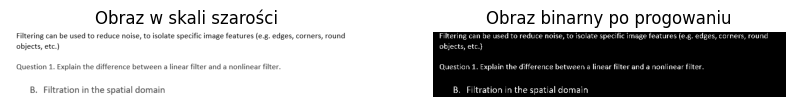

In [47]:
# Wczytanie obrazu
foto = io.imread("text.png")

# Usunięcie kanału alfa
image_rgb = foto[:, :, :3]  # Zostawiamy tylko trzy pierwsze kanały (R, G, B)

# Konwersja na skalę szarości
gray = color.rgb2gray(image_rgb)

# Progowanie obrazu
threshold = filters.threshold_otsu(gray)  # Wykorzystanie metody Otsu
binary_image = gray > threshold

# Wykorzystanie metody Otsu, Celem metody jest wyznaczenie optymalnego progu progowania, 
# który minimalizuje wewnętrzną wariancję między klasami pikseli, 
# czyli oddziela tło od obiektów na obrazie jak najbardziej efektywnie. 
# Metoda Otsu działa przez obliczenie progu, dla którego suma kwadratów wag klas (obiekt i tło), 
# pomnożonych przez ich wariancje, jest minimalna.


# Wyświetlenie obrazów
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Obraz w skali szarości')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='binary')
plt.title('Obraz binarny po progowaniu')
plt.axis('off')
plt.savefig('Obraz_binarny.png')

plt.show()

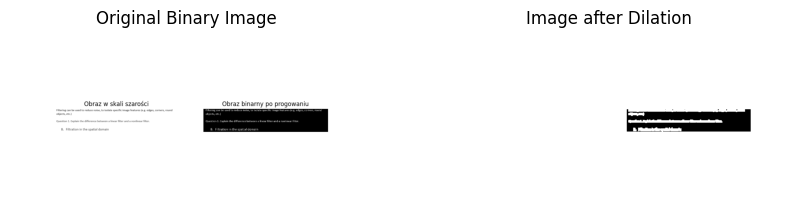

In [48]:
# Wczytanie obrazu binarnego
binary_image = io.imread("Obraz_binarny.png", as_gray=True)

# Dylatacja obrazu binarnego używając kwadratowego elementu strukturalnego
dilated_image = morphology.binary_dilation(binary_image, morphology.square(3))

# Wyświetlenie obrazów przed i po dylatacji
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Image after Dilation')
plt.axis('off')

plt.show()

In [49]:
#Pytanie 12. Co spowodowało zastosowanie dylatacji? Czy należy zastosować ją wielokrotnie?

#Dylatacja jest techniką morfologicznego przetwarzania obrazów, która służy do rozszerzania i zwiększania regionów 
# obiektów, co pomaga w łączeniu blisko położonych elementów, zwiększaniu małych obiektów oraz usuwaniu drobnych 
# artefaktów i szumów. Decyzja o wielokrotnym stosowaniu dylatacji zależy od specyficznych wymagań projektu i 
# celu przetwarzania. Może być użyteczna, gdy potrzebne jest znaczące powiększenie obiektów lub wypełnienie
# większych luk między elementami obrazu, co jest często stosowane w przetwarzaniu obrazów przemysłowych i medycznych, 
# gdzie wyraźne i rozróżnialne obiekty są kluczowe dla analizy.

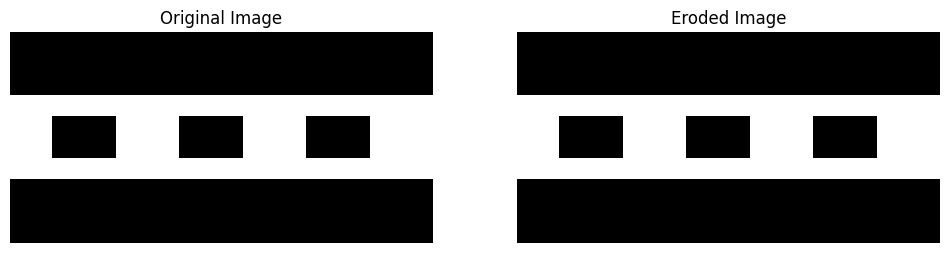

In [50]:
# Definicja obrazu 
image = np.zeros((10, 20), dtype=int)
image[3:7, :] = 1  # Wypełnienie szerokiego pasu na obrazie
image[4:6, 2:5] = 0  # Usunięcie pikseli, tworzenie "dziur"
image[4:6, 8:11] = 0
image[4:6, 14:17] = 0

# Definicja elementu strukturalnego B
selem = np.array([[1]])

# Erozja obrazu
eroded_image = morphology.binary_erosion(image, selem)

# Wyświetlenie obrazów przed i po erozji
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.show()

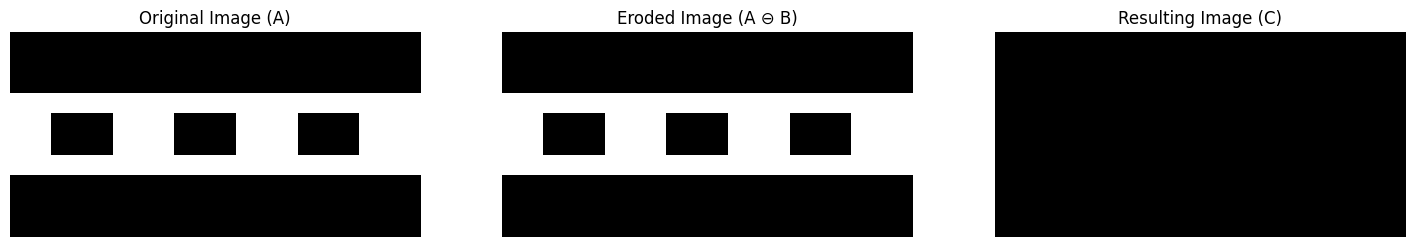

In [51]:
# Definicja obrazu A 
image = np.zeros((10, 20), dtype=int)
image[3:7, :] = 1  

# Wstawianie białych kwadratów jako "dziury"
image[4:6, 2:5] = 0
image[4:6, 8:11] = 0
image[4:6, 14:17] = 0

# Definicja elementu strukturalnego B (mały kwadrat z centralnym pikselem)
selem = np.array([[1]])

# Erozja obrazu
eroded_image = morphology.binary_erosion(image, selem)

# Obliczenie C = A - (A ⊖ B)

edge_image = image - eroded_image

# Wyświetlenie obrazów
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image (A)')
plt.axis('off')

plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image (A ⊖ B)')
plt.axis('off')

plt.subplot(133)
plt.imshow(edge_image, cmap='gray')
plt.title('Resulting Image (C)')
plt.axis('off')

plt.show()


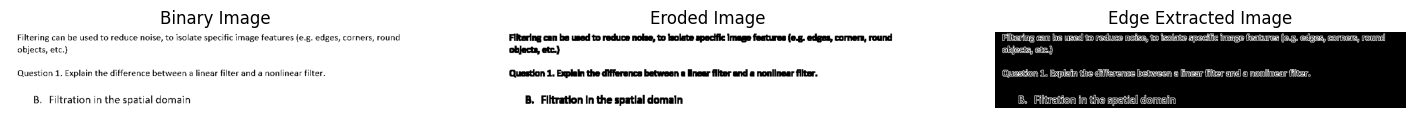

In [52]:
# Wczytanie obrazu
image = io.imread('text.png')

# Usunięcie kanału alfa, jeśli istnieje (zakładamy, że kanał alfa to czwarty kanał)
if image.shape[2] == 4:
    image = image[:, :, :3]  # Usuwanie kanału alfa

# Konwersja na skalę szarości
gray_image = color.rgb2gray(image)

# Progowanie Otsu do konwersji na obraz binarny
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# Definicja elementu strukturalnego
selem = np.ones((3, 3), dtype=bool)  

# Erozja obrazu
eroded_image = morphology.binary_erosion(binary_image, selem)

# Ekstrakcja krawędzi: C = A - (A ⊖ B)

edge_image = binary_image ^ eroded_image

# Wyświetlenie obrazów
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Extracted Image')
plt.axis('off')

plt.show()


In [53]:
#Pytanie 13. Opisz jakie zastosowanie może mieć algorytm opracowany w zadaniu 11 i 12.

#Erozja pomaga w eliminacji drobnych artefaktów i szumów, co jest szczególnie ważne w analizie obrazów medycznych, 
# takich jak rentgen, MRI czy CT, gdzie dokładność jest krytyczna. Ta technika jest również wykorzystywana w systemach
# rozpoznawania wzorców, gdzie usunięcie małych nieprawidłowości może znacznie poprawić klasyfikację i rozpoznawanie 
# wzorców, na przykład w analizie odcisków palców lub rozpoznawaniu znaków. W przemyśle, erozja jest używana do usuwania 
# niepożądanych drobnych obiektów z obrazów na automatycznych liniach produkcyjnych, co pomaga w zachowaniu wysokich standardów kontroli jakości.

#Z drugiej strony, ekstrakcja krawędzi jest niezastąpiona w identyfikacji granic obiektów, co ma zastosowanie w 
# technologiach, gdzie precyzyjne określenie lokalizacji obiektów jest kluczowe, jak w nawigacji robotów czy systemach
# autonomicznych. W medycynie, technika ta umożliwia wykrywanie zmian patologicznych, takich jak guzy na obrazach
# mammograficznych czy zmiany w naczyniach krwionośnych. Ekstrakcja krawędzi jest także wykorzystywana do wzmocnienia 
# cech w zaawansowanych systemach rozpoznawania obrazów, co znajduje zastosowanie w rozpoznawaniu twarzy oraz analizie 
# obrazów satelitarnych. 